## Imports

In [28]:
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [29]:
plt.rcParams.update(
    {
        "axes.facecolor": "white",
        "axes.edgecolor": "black",
        "axes.grid": False,
        "grid.color": "gray",
        "grid.linestyle": "--",
        "grid.linewidth": 0.5,
        "figure.facecolor": "white",
        "font.size": 14,
        "font.family": "serif",
        "axes.labelsize": 16,
        "axes.titlesize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 16,
        "figure.titlesize": 20,
        "text.usetex": True,
    }
)

In [30]:
# Define the color PALETTE
PALETTE = {
    "Eggshell": "#f4f1de",
    "Sunset": "#f2cc8f",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "black": "#000000",
}

## Data loading

In [31]:
import json

with open('./plot_data/task_class_nn_tsvm.json', 'r') as f:
    class_acc_nn_tsvm = json.loads(f.read())

with open('./plot_data/task_class_nn_zeroshot.json', 'r') as f:
    class_acc_nn_zeroshot = json.loads(f.read())
    
with open('./plot_data/finetuning_accs.json', 'r') as f:
    class_acc_ft = json.loads(f.read())

with open('./plot_data/task_class_proj.json', 'r') as f:
    task_class_proj = json.loads(f.read())

## Task prediction accuracies

In [32]:

task_pred_acc_nn_tsvm = np.mean(list(class_acc_nn_tsvm.values()))
task_pred_acc_nn_zeroshot = np.mean(list(class_acc_nn_zeroshot.values()))
task_pred_acc_proj = np.mean(list(task_class_proj.values()))


In [33]:
print(task_pred_acc_nn_tsvm, task_pred_acc_nn_zeroshot, task_class_proj)

0.9159771203994751 0.9273429334163665 {'CIFAR10': 0.4952000081539154, 'CIFAR100': 0.46889999508857727, 'Cars': 0.9980102181434631, 'DTD': 0.9264184236526489, 'EMNIST': 0.8424999713897705, 'EuroSAT': 0.738194465637207, 'FER2013': 0.9877403378486633, 'FashionMNIST': 0.7355999946594238, 'Flowers102': 0.9969100952148438, 'Food101': 0.9677623510360718, 'GTSRB': 0.9656373858451843, 'KMNIST': 0.4828000068664551, 'MNIST': 0.8756999969482422, 'OxfordIIITPet': 0.9940038323402405, 'PCAM': 0.97308349609375, 'RESISC45': 0.8525396585464478, 'RenderedSST2': 0.9994508624076843, 'STL10': 0.6888750195503235, 'SUN397': 0.9323425889015198, 'SVHN': 0.7733558416366577}


In [34]:
class_acc_nn_tsvm_estimated = {k: (v * class_acc_ft[k]) for k, v in class_acc_nn_tsvm.items()}
class_acc_nn_zeroshot_estimated = {k: (v * class_acc_ft[k]) for k, v in class_acc_nn_zeroshot.items()}
task_class_proj_estimated = {k: (v * class_acc_ft[k]) for k, v in task_class_proj.items()}

In [40]:
print(np.mean(list(class_acc_nn_tsvm_estimated.values())), np.mean(list(class_acc_nn_zeroshot_estimated.values())), np.mean(list(task_class_proj_estimated.values())))

0.8366334382374234 0.8471632398720657 0.7553745694275855


## Plots

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_chart(data_list, model_labels, color_map, title="Radar Chart"):
    """
    Plots a radar chart for multiple dictionaries of data.
    
    Parameters:
    -----------
    data_list : list of dict
        Each dict contains {category_name: value} pairs.
        All dicts should have the same keys (categories).
    model_labels : list of str
        Labels for each dict in data_list (e.g. "Model A", "Model B", ...).
        Must match the length of data_list.
    color_map : dict
        Mapping from model label (str) to color (e.g. {'Model A': 'red', ...}).
    title : str, optional
        Title of the radar chart.
    """

    # -- 1) Gather categories from the first dictionary --
    #    (Assumes all dictionaries share the same keys in the same order)
    categories = list(data_list[0].keys())
    N = len(categories)

    # -- 2) Compute the angle for each category --
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    # Repeat the first angle to close the circle
    angles += angles[:1]

    # -- 3) Create polar subplot --
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Move the 0° axis to the top
    ax.set_theta_offset(np.pi / 2)
    # Flip direction so that angles increase clockwise
    ax.set_theta_direction(-1)

    # -- 4) Set the category labels around the circle --
    plt.xticks(angles[:-1], categories)

    # Optionally, set radial limits. For typical 0-1 data, use [0, 1.1]
    ax.set_ylim(0, 1.1)

    # -- 5) Plot each dictionary's data --
    for data_dict, label in zip(data_list, model_labels):
        # Extract values in the same category order
        values = [data_dict[cat] for cat in categories]
        # Close the data loop
        values += values[:1]

        # Fetch color from the color map
        color = color_map.get(label, 'black')  # default to black if not found

        # Plot the outline
        ax.plot(angles, values, color=color, linewidth=2, label=label)
        # Fill the area
        ax.fill(angles, values, color=color, alpha=0.1)

    # -- 6) Final touches: legend, title, etc. --
    plt.title(title, y=1.08)

    # Add a consistent legend for all subplots
    plt.legend(
        loc="lower center",
        # mode="expand",
        ncol=len(data_list),
        bbox_to_anchor=[0.5, -0.18],
        markerscale=2.5,
        frameon=False,
        labelspacing=2,
    )


    plt.tight_layout()
    plt.show()


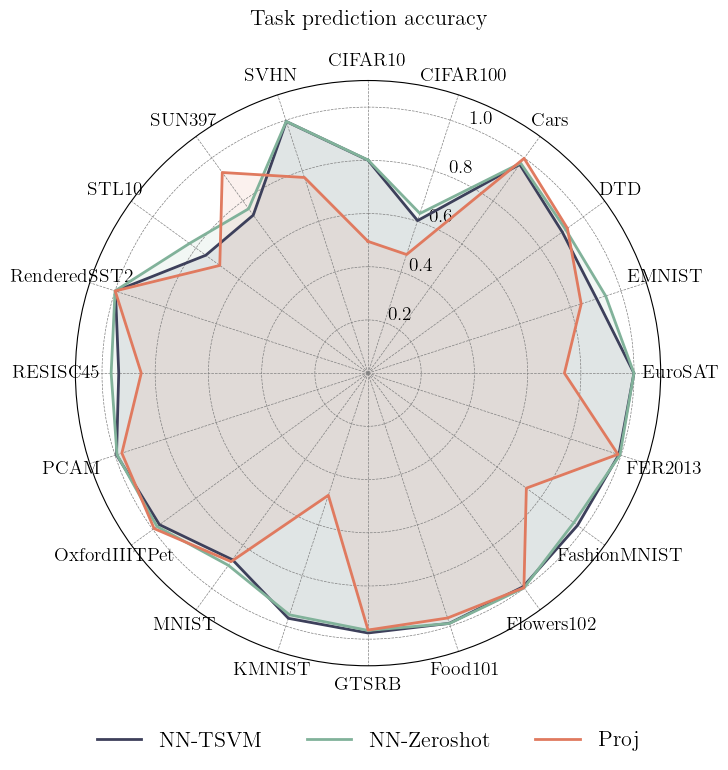

In [39]:
color_map = {
    "NN-TSVM": PALETTE["Delft Blue"],
    "NN-Zeroshot": PALETTE["Cambridge blue"],
    "Proj": PALETTE["Burnt sienna"],
}
plot_radar_chart([class_acc_nn_tsvm, class_acc_nn_zeroshot, task_class_proj], ["NN-TSVM", "NN-Zeroshot", "Proj"], color_map, title="Task prediction accuracy")